
# Decision Tree

Decision Trees are a popular and versatile machine learning algorithm used for both classification and regression tasks. They represent decisions and decision-making processes in a tree-like structure, where each internal node represents a feature (or attribute), each branch represents a decision rule, and each leaf node represents an outcome.

![Decision Tree for Heart Attack Prevention](https://images.datacamp.com/image/upload/v1677504957/decision_tree_for_heart_attack_prevention_2140bd762d.png)

**How They Work**  
1. **Selection of Attribute** The algorithm selects the best attribute from the dataset using a metric, commonly entropy and information gain, or Gini impurity.
2. **Splitting** Based on the best attribute found, the dataset is split into subsets.
3. **Repetition** Steps 1 and 2 are repeated recursively for each subset until one of the termination conditions matches, such as the maximum tree depth or minimum split size.

**Significance**  
- Decision Trees have been instrumental in predictive modeling for decades.
- Classical decision tree algorithms have evolved, and their modern variations, like random forests, are among the most potent techniques in machine learning.

**Classification and Regression Trees (CART)**  
Introduced by `Leo Breiman`, the term "CART" refers to decision tree algorithms that can handle both classification and regression predictive modeling tasks. While they are traditionally called "decision trees", some platforms, especially R, prefer the term CART.

**Extensions of CART**  
The core principles of the `CART` algorithm have been extended to develop other powerful algorithms:
- **Bagged Decision Trees** Uses bootstrapping to create multiple datasets from the original and builds a tree for each, then aggregates the predictions.
- **Random Forests** Enhances bagging by adding feature randomness in the selection process, building more diverse trees.
- **Boosted Decision Trees** Builds trees sequentially, where each tree corrects the errors of its predecessor.

**Advantages**  
- **Interpretability** Trees can be visualized and are easy to understand.
- **Flexibility** Can handle both numerical and categorical data.
- **Non-linear Relationships** Capable of modeling non-linear decision boundaries.

**Drawbacks**  
- **Overfitting** Without proper pruning or depth limitation, they can overfit to the training data.
- **Instability** Small changes in data can lead to a completely different tree.
- **Optimization** Finding the optimal tree is an NP-complete problem; heuristics like greedy algorithms are used in practice, which can lead to sub-optimal trees.


### CART Model - Overview

The Classification and Regression Trees (CART) model is represented fundamentally as a binary tree structure, a concept familiar to those who have studied algorithms and data structures.

At its essence, this binary tree is quite straightforward. Each root node, or internal node, symbolizes a particular input variable (often denoted as \( x \)) and a corresponding threshold or split point on that variable. This is typically applicable when the variable in question is of a numeric nature.

Proceeding further down the tree, the terminal nodes, commonly known as leaf nodes, encompass an output variable (denoted as \( y \)). This output variable provides the basis for generating a predictive value or result.

When presented with a new input for prediction, one would start at the tree's root node. The tree is then navigated systematically based on the input's attributes, leading to a specific leaf node that offers the prediction.

#### **Merits of Decision Trees**

* **Intuitiveness** Their structure is inherently easy to grasp and interpret. Moreover, their visual representation provides a clear, hierarchical view of decision-making criteria.
* **Minimal Data Pre-processing** Unlike some algorithms that demand rigorous data preparation, decision trees are relatively accommodating.
* **Versatility in Data Handling** They are proficient in managing datasets comprising both numerical and categorical attributes.
* **Model Validation** There's an opportunity to utilize statistical tests to ascertain the tree's reliability, offering more confidence in its predictions.
* **Robustness** Even if the underlying assumptions of the decision tree are slightly off-mark compared to the actual data generation model, they can still deliver reasonably accurate predictions.

#### **Limitations of Decision Trees**

* **Overfitting Predicament** Trees, especially deep ones, can memorize the training data, causing them to overfit. While mechanisms like pruning can counteract this, it's essential to be aware of other strategies, such as setting limits on tree depth or mandating a minimum number of samples at leaf nodes.
* **Inherent Instability** Minor variations in data can result in substantially different tree structures. A common remedy is to employ decision trees as part of an ensemble approach.
* **Local Optimality** The tree-building process might not always lead to the globally best tree structure. However, one can overcome this by constructing multiple trees as part of an ensemble learning method.
* **Potential Bias with Imbalanced Classes** Trees might exhibit bias if certain classes heavily dominate the dataset. To rectify this, one can balance the dataset before the tree-building process.


# Random Forest

At its core, Random Forest is an ensemble machine learning algorithm. The term "ensemble" signifies that it leverages multiple individual models to produce an aggregated and often more accurate result. Specifically, Random Forest falls under a category of ensemble methods known as **Bootstrap Aggregation**, commonly abbreviated as **bagging**. Random Forest is a standout technique in the vast world of machine learning algorithms. Its popularity and efficacy have made it a go-to choice for many data scientists and researchers across various domains. Random Forest stands as a testament to the idea that sometimes, the collective power of many relatively simple models can outperform even the most complex singular models.

![Random Forest Visualization](https://pages.cms.hu-berlin.de/EOL/geo_rs/fig/s09_rf-concept.png)

#### **How Does It Work?**

1. **Bootstrap Sampling** For each tree in the forest, a subset of the training data is selected with replacement (meaning the same data point can be sampled more than once). This subset is used to train the individual tree.
2. **Feature Randomness** Instead of considering all features for making the best split at each node (as a conventional decision tree would), Random Forest selects a random subset of features. This introduces variability among the trees and ensures that the ensemble is diverse.
3. **Aggregation** Once all trees have made their individual predictions, Random Forest aggregates these predictions. For regression tasks, this is typically the average of the outputs. For classification, it's a majority vote.

#### **Enhancing Decision Trees**

A core motivation behind the development of Random Forest was to address some of the limitations of standalone decision trees. While decision trees are intuitive and easy to visualize, they can often overfit to training data, especially when they are deep. By building multiple trees and introducing randomness in both the data samples and features considered for splits, Random Forest mitigates overfitting. Each tree in the ensemble might capture different patterns, and their combined predictions tend to be more generalizable and robust.

#### **Key Takeaways**

- Random Forest is a powerful ensemble method that combines multiple decision trees.
- By introducing randomness in both data sampling and feature selection, it ensures diversity among individual trees.
- The aggregation of predictions from individual trees results in a more robust and often more accurate model.
- While individual decision trees might overfit to specific patterns in the data, the ensemble approach of Random Forest typically provides a more balanced and generalized solution.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

%matplotlib inline
#sns.set_style("whitegrid")
#plt.style.use("fivethirtyeight")

## About the dataset

### **IBM HR Analytics Employee Attrition & Performance**

**Link:**  
[IBM HR Analytics Employee Attrition & Performance on Kaggle](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

#### **Overview**
The dataset provides insights into the factors that might be associated with employee attrition. By analyzing the data, businesses and HR professionals can uncover patterns, relationships, and potential causes for why employees leave the company. The dataset contains several features (or columns) that capture various attributes of employees, ranging from their job role to their job satisfaction. The primary goal when using this dataset is to predict employee attrition based on the given features. Additionally, one can explore correlations and patterns, such as how distance from home affects attrition rates among different job roles or how average monthly income varies by education and attrition.

**Note:**  
Since this is a fictional dataset, the patterns and results derived from it might not reflect real-world scenarios. However, it offers a great starting point for practicing data analysis, visualization, and machine learning in the context of HR analytics.

#### **Key Features:**
1. **Education:**  
   - `1`: 'Below College'
   - `2`: 'College'
   - `3`: 'Bachelor'
   - `4`: 'Master'
   - `5`: 'Doctor'

2. **EnvironmentSatisfaction:**  
   - `1`: 'Low'
   - `2`: 'Medium'
   - `3`: 'High'
   - `4`: 'Very High'

3. **JobInvolvement:**  
   - `1`: 'Low'
   - `2`: 'Medium'
   - `3`: 'High'
   - `4`: 'Very High'

4. **JobSatisfaction:**  
   - `1`: 'Low'
   - `2`: 'Medium'
   - `3`: 'High'
   - `4`: 'Very High'

5. **PerformanceRating:**  
   - `1`: 'Low'
   - `2`: 'Good'
   - `3`: 'Excellent'
   - `4`: 'Outstanding'

6. **RelationshipSatisfaction:**  
   - `1`: 'Low'
   - `2`: 'Medium'
   - `3`: 'High'
   - `4`: 'Very High'

7. **WorkLifeBalance:**  
   - `1`: 'Bad'
   - `2`: 'Good'
   - `3`: 'Better'
   - `4`: 'Best'



## Obtain the data

In [2]:
df = pd.read_csv("ibm_hr_dataset.csv")
df.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
402,30,No,Travel_Rarely,1082,Sales,12,3,Technical Degree,1,533,...,2,80,0,6,6,3,5,4,4,4
268,45,No,Travel_Rarely,1385,Research & Development,20,2,Medical,1,372,...,2,80,0,21,2,3,20,7,4,10
699,52,No,Travel_Rarely,1053,Research & Development,1,2,Life Sciences,1,976,...,2,80,1,26,2,2,9,8,7,8
1075,32,No,Travel_Rarely,495,Research & Development,10,3,Medical,1,1516,...,2,80,0,10,5,4,5,2,0,0
126,58,Yes,Travel_Rarely,147,Research & Development,23,4,Medical,1,165,...,4,80,1,40,3,2,40,10,15,6


## Exploratory Data Analysis

In [3]:
# Looking for NaNs
display(df.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Columns in-depth analysis

In [6]:
for column in df.columns:
    print(f"{df[column].nunique()} unique values in {column}: {df[column].unique()}\n")

43 unique values in Age: [41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]

2 unique values in Attrition: ['Yes' 'No']

3 unique values in BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

886 unique values in DailyRate: [1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329

### Remove useless columns

In [7]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

<Axes: xlabel='Attrition', ylabel='count'>

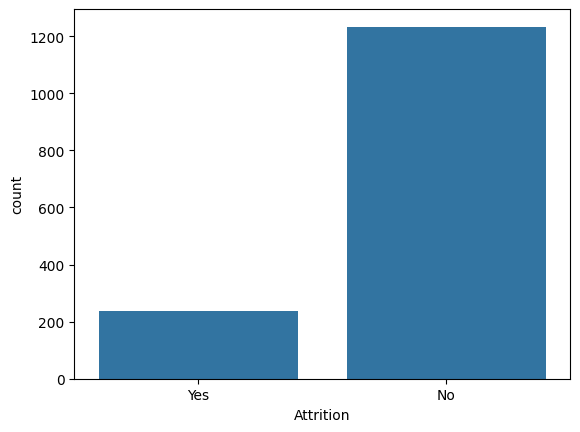

In [8]:
sns.countplot(x='Attrition', data=df)

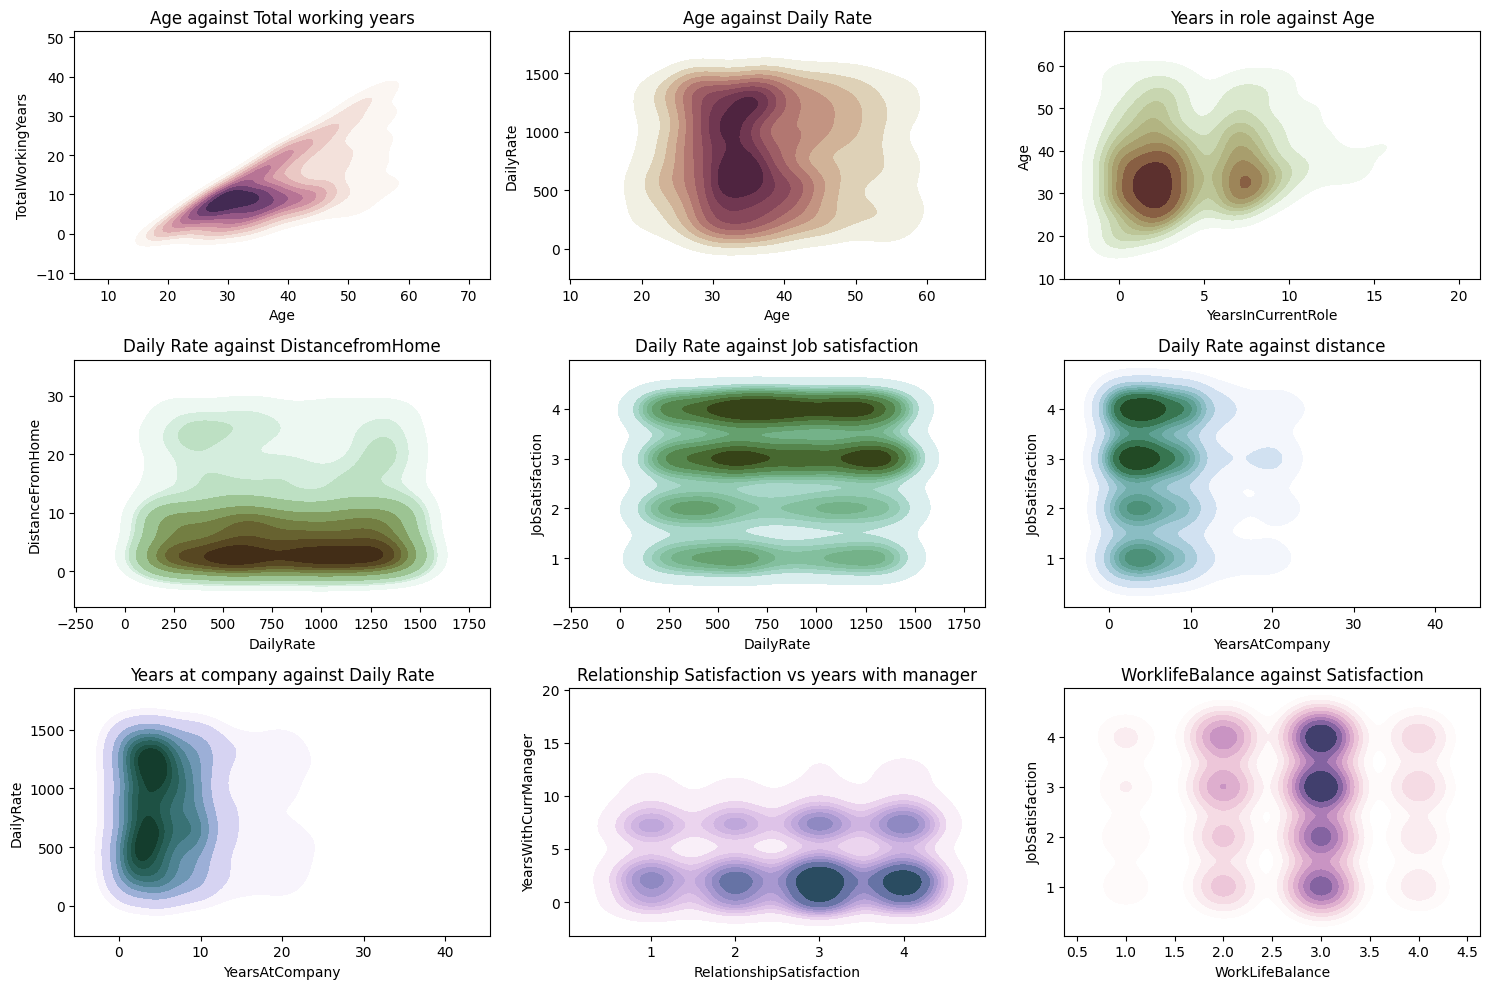

In [9]:
# Plotting the KDEplots
figure, axes = plt.subplots(3, 3, figsize=(15, 10), 
                       sharex=False, sharey=False)

# Defining our colormap scheme
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
sns.kdeplot(df, x="Age", y="TotalWorkingYears", cmap=cmap, fill=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'Age against Total working years')
cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)

# Generate and plot
sns.kdeplot(df, x="Age", y="DailyRate", cmap=cmap, fill=True, ax=axes[0,1])
axes[0,1].set( title = 'Age against Daily Rate')
cmap = sns.cubehelix_palette(start = 0.666666666667, light = 1, as_cmap = True)

# Generate and plot
sns.kdeplot(df, x="YearsInCurrentRole", y="Age", cmap=cmap, fill=True, ax=axes[0,2])
axes[0,2].set( title = 'Years in role against Age')
cmap = sns.cubehelix_palette(start = 1.0, light = 1, as_cmap = True)

# Generate and plot
sns.kdeplot(df, x="DailyRate", y="DistanceFromHome", cmap=cmap, fill=True,  ax=axes[1,0])
axes[1,0].set( title = 'Daily Rate against DistancefromHome')
cmap = sns.cubehelix_palette(start = 1.333333333333, light = 1, as_cmap = True)

# Generate and plot
sns.kdeplot(df, x="DailyRate", y="JobSatisfaction", cmap=cmap, fill=True,  ax=axes[1,1])
axes[1,1].set( title = 'Daily Rate against Job satisfaction')
cmap = sns.cubehelix_palette(start = 1.666666666667, light = 1, as_cmap = True)

# Generate and plot
sns.kdeplot(df, x="YearsAtCompany", y="JobSatisfaction", cmap=cmap, fill=True,  ax=axes[1,2])
axes[1,2].set( title = 'Daily Rate against distance')
cmap = sns.cubehelix_palette(start = 2.0, light = 1, as_cmap = True)

# Generate and plot
sns.kdeplot(df, x="YearsAtCompany", y="DailyRate", cmap=cmap, fill=True,  ax=axes[2,0])
axes[2,0].set( title = 'Years at company against Daily Rate')
cmap = sns.cubehelix_palette(start = 2.333333333333, light = 1, as_cmap = True)

# Generate and plot
sns.kdeplot(df, x="RelationshipSatisfaction", y="YearsWithCurrManager", cmap=cmap, fill=True,  ax=axes[2,1])
axes[2,1].set( title = 'Relationship Satisfaction vs years with manager')
cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)

# Generate and plot
sns.kdeplot(df, x="WorkLifeBalance", y="JobSatisfaction", cmap=cmap, fill=True,  ax=axes[2,2])
axes[2,2].set( title = 'WorklifeBalance against Satisfaction')

figure.tight_layout()

In [10]:
# creating a list of only numerical values
numerical = [u'Age', u'DailyRate', u'DistanceFromHome', 
             u'Education', u'EnvironmentSatisfaction',
             u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
             u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
             u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
             u'StockOptionLevel', u'TotalWorkingYears',
             u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
             u'YearsInCurrentRole', u'YearsSinceLastPromotion',u'YearsWithCurrManager']
data = [
    go.Heatmap(
        z=df[numerical].astype(float).corr().values,
        x=df[numerical].columns.values,
        y=df[numerical].columns.values,
        colorscale='Viridis',
        reversescale = False,
        opacity = 1.0
    )
]

layout = go.Layout(
    title='Pearson Correlation of numerical features',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' ),
    width = 900, height = 900,
    
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

## Hunting for columns that are categorical in nature

In [11]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)

# convert the Attrition column to a categorical type and then encoding its values to numerical codes
df['Attrition'] = df.Attrition.astype("category").cat.codes

# then remove it from categorical ones for successive processing
categorical_col.remove('Attrition')

# Data Processing

Let's encode the categorical features in a meaningful way

In [12]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Columns to be one-hot encoded
onehot_encoded_columns = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus","OverTime"]
# Columns to be label encoded
label_encoded_columns = ["Education", "EnvironmentSatisfaction", "JobInvolvement", "JobLevel", "JobSatisfaction"]

# Applying OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)  # 'drop' parameter is used to avoid multicollinearity
for column in onehot_encoded_columns:
    # The encoder returns a 2D array, which we need to convert to a DataFrame
    onehot_df = pd.DataFrame(encoder.fit_transform(df[[column]]))
    
    # The new columns will be named after the classes detected by the encoder
    onehot_df.columns = encoder.get_feature_names_out([column])
    
    # Drop the original column from the main DataFrame
    df.drop([column], axis=1, inplace=True)
    
    # Concatenate the one-hot encoded DataFrame to the main one
    df = pd.concat([df, onehot_df], axis=1)

# Applying LabelEncoder
le = LabelEncoder()
for column in label_encoded_columns:
    df[column] = le.fit_transform(df[column])

df.sample(5)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
465,46,0,1034,18,0,0,86,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1335,39,0,835,19,3,3,41,2,1,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
924,35,0,735,6,0,2,66,2,0,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
24,34,1,699,6,0,1,83,2,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
197,42,0,926,21,1,2,36,2,1,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# a last check before continuing - Looking for NaNs
display(df.isnull().any())

Age                                  False
Attrition                            False
DailyRate                            False
DistanceFromHome                     False
Education                            False
EnvironmentSatisfaction              False
HourlyRate                           False
JobInvolvement                       False
JobLevel                             False
JobSatisfaction                      False
MonthlyIncome                        False
MonthlyRate                          False
NumCompaniesWorked                   False
PercentSalaryHike                    False
PerformanceRating                    False
RelationshipSatisfaction             False
StockOptionLevel                     False
TotalWorkingYears                    False
TrainingTimesLastYear                False
WorkLifeBalance                      False
YearsAtCompany                       False
YearsInCurrentRole                   False
YearsSinceLastPromotion              False
YearsWithCu

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)
y = df.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Applying Tree & Random Forest algorithms

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## Decision Tree Classifier

A Decision Tree Classifier is a powerful method for classification tasks. Below are the parameters that can be adjusted to optimize its performance:

- **Criterion**: 
  - `gini` - Uses Gini impurity to measure quality of a split.
  - `entropy` - Uses information gain as the criterion.

- **Splitter**:
  - `best` - Chooses the best split.
  - `random` - Chooses the best random split.

- **Tree Depth**:
  - `max_depth` - Controls the maximum depth of the tree. If not set, the tree expands until all leaves are pure.

- **Samples for Splitting**:
  - `min_samples_split` - The minimum number of samples required for a node split.

- **Samples at Leaf Node**:
  - `min_samples_leaf` - The minimum number of samples that a leaf node must have.

- **Weight Fraction at Leaf Node**:
  - `min_weight_fraction_leaf` - The minimum weighted fraction of the sum of weights needed at a leaf node.

- **Features Consideration**:
  - `max_features` - The number of features to consider for the best split.

- **Leaf Nodes**:
  - `max_leaf_nodes` - The maximum number of leaf nodes. Grows the tree in a best-first fashion.

- **Impurity Decrease**:
  - `min_impurity_decrease` - A node will split if the impurity decrease is at least this value.

- **Impurity Split**:
  - `min_impurity_split` - The threshold for early stopping in tree growth. Splits if impurity is above this threshold.

In [16]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
_______________________________________________
Confusion Matrix: 
 [[863   0]
 [  0 166]]

Test Result:
Accuracy Score: 75.06%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.853261   0.232877  0.750567    0.543069      0.753380
recall       0.848649   0.239437  0.750567    0.544043      0.750567
f1-score     0.850949   0.236111  0.750567    0.543530      0.751961
support    370.000000  71.000000  0.750567  441.000000    441.000000
_______________________________________________
Conf

## Decision Tree Classifier Hyperparameter tuning

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(
    tree_clf, 
    params, 
    scoring="f1", 
    n_jobs=-1, 
    verbose=1, 
    cv=5
)

tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Best paramters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 18, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 87.07%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.898472    0.646018  0.870748     0.772245      0.857745
recall       0.953650    0.439759  0.870748     0.696705      0.870748
f1-score     0.925239    0.523297  0.870748     0.724268      0.860397
support    863.000000  166.000000  0.870748  1029.000000   1029.000000
_______________________________________________
Confusion Matrix: 
 [[823  40]
 [ 93  73]]

Test Result:
Accuracy Score: 82.54%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.874680   0.440000  0.825397    0.657340      0.804698
recall     

### Visualization of a tree

You need to install GraphViz from https://www.graphviz.org/download/

In [18]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns)
features.remove("Attrition")

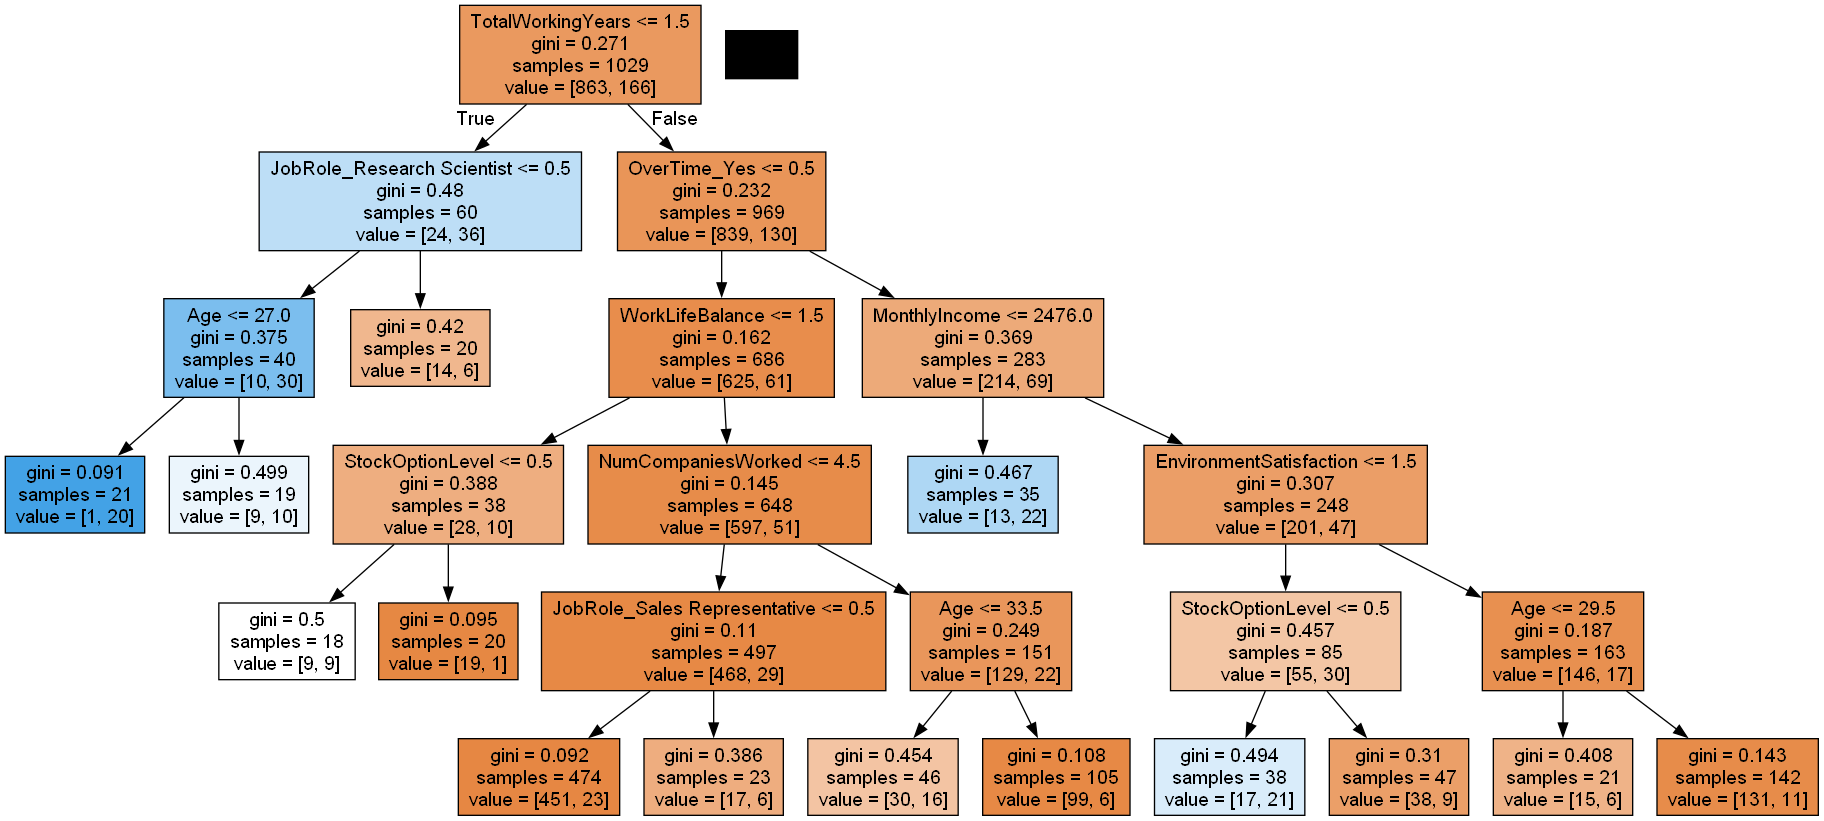

In [19]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

# **Random Forest**

A **Random Forest** is a meta estimator that fits multiple decision tree classifiers on various sub-samples of the dataset. It then averages the results to boost predictive accuracy and control overfitting.

---

### **Key Algorithm Parameters**

- **`n_estimators`**: 
  - *Description*: The number of trees in the forest.

- **`criterion`**: 
  - *Description*: Function to measure split quality.
  - *Options*: 
    - "`gini`" for Gini impurity
    - "`entropy`" for information gain.

- **`max_depth`**: 
  - *Description*: Maximum depth of the tree. If `None`, nodes expand until leaves are pure or until all leaves have fewer than `min_samples_split` samples.

- **`min_samples_split`**: 
  - *Description*: Minimum samples required to split an internal node.

- **`min_samples_leaf`**: 
  - *Description*: Minimum samples required at a leaf node. A split will only be considered if it leaves at least this many training samples in both left and right branches.

- **`min_weight_fraction_leaf`**: 
  - *Description*: Minimum weighted fraction of total sample weights required at a leaf node.

- **`max_features`**: 
  - *Description*: Number of features considered for the best split.

- **`max_leaf_nodes`**: 
  - *Description*: Trees grow with this maximum number of leaf nodes in a best-first fashion.

- **`min_impurity_decrease`**: 
  - *Description*: A node will split if the impurity decrease from this split is equal to or exceeds this value.

- **`min_impurity_split`**: 
  - *Description*: Threshold for early stopping in tree growth.

- **`bootstrap`**: 
  - *Description*: Indicates if bootstrap samples are used when building trees.

- **`oob_score`**: 
  - *Description*: Use out-of-bag samples to estimate generalization accuracy.

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
_______________________________________________
Confusion Matrix: 
 [[863   0]
 [  0 166]]

Test Result:
Accuracy Score: 83.67%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.853081   0.473684  0.836735    0.663382      0.791999
recall       0.972973   0.126761  0.836735    0.549867      0.836735
f1-score     0.909091   0.200000  0.836735    0.554545      0.794929
support    370.000000  71.000000  0.836735  441.000000    441.000000
_______________________________________________
Conf

In [21]:
# Scatter plot 
trace = go.Scatter(
    y = rf_clf.feature_importances_,
    x = df.columns.values,
    mode = 'markers',
    marker = dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf_clf.feature_importances_,
        colorscale = 'Portland',
        showscale = True
    ),
    text = df.columns.values
)
data = [trace]

layout = go.Layout(
    autosize = True,
    title = 'Random Forest Feature Importance',
    hovermode = 'closest',
    xaxis = dict(
        ticklen = 5,
        showgrid = False,
        zeroline = False,
        showline = False
    ),
    yaxis = dict(
        title = 'Feature Importance',
        showgrid = False,
        zeroline = False,
        ticklen = 5,
        gridwidth = 2
    ),
    showlegend = False
)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'scatter_rfclf_01')

## Gini Impurity vs. Entropy

**Gini Impurity** and **Entropy** are both measures used to quantify disorder or uncertainty in a dataset. These metrics are pivotal in decision tree algorithms for classification tasks, as they help determine the best feature to split on at each step. In decision trees, by leveraging either Gini impurity or entropy, the algorithm can make better-informed decisions, leading to more accurate and effective models.



### Gini Impurity

#### 1. **Definition**
- Gini impurity measures the disorder in a dataset. It calculates how often a randomly chosen element would be incorrectly classified.

#### 2. **Interpretation**
- A Gini impurity of **0** means the set is perfectly homogeneous, where all elements belong to a single class.
- A higher value indicates more disorder or mix of classes.

#### 3. **Advantages**
- Slightly faster to compute than entropy, which can lead to quicker training times for large datasets.



### Entropy

#### 1. **Definition**
- Entropy is another measure of disorder or randomness in a dataset. It quantifies the amount of uncertainty associated with the randomness in the outcomes.

#### 2. **Interpretation**
- An entropy of **0** indicates that the set is completely ordered; all elements are of the same class.
- Maximum entropy means the dataset is split evenly among all classes, signifying complete randomness.

#### 3. **Advantages**
- While more computationally intensive than Gini, entropy might sometimes be more sensitive to differences between classes, especially when the class distribution is uneven.



### Comparison

- **Similarities** Both Gini impurity and entropy aim to measure disorder or uncertainty in a dataset. In many cases, they might lead to similar decision trees.
  
- **Differences** While Gini is faster and therefore often the default in algorithms, entropy might be more sensitive in certain scenarios, especially when there's a significant imbalance in class distribution.

- **Choice** The choice between Gini and entropy often comes down to specific dataset characteristics and computational considerations. In practice, it's beneficial to experiment with both to determine which one performs better for a particular problem.

---



# Random Forest hyperparameter tuning

### Randomized Search Cross Validation

**Randomized Search Cross Validation** (often shortened to **RandomizedSearchCV**) is a technique used to optimize hyperparameters in machine learning models. Instead of trying out every possible combination of hyperparameters (as in Grid Search), RandomizedSearchCV samples a fixed number of hyperparameter combinations from specified probability distributions.

#### Key Points

1. **Parameter Space**
   - Before we start the randomized search, we define a search space for each hyperparameter. This can be a list of values or a continuous distribution.
    
2. **Random Sampling**
   - RandomizedSearchCV randomly selects a set number of these hyperparameter combinations. This approach is especially useful when dealing with a large parameter space, as it's more computationally efficient than exhaustively searching all combinations.

3. **Cross Validation**
   - For each randomly selected combination of hyperparameters, RandomizedSearchCV performs cross-validation. This involves splitting the training data into several subsets (or "folds"), training the model on some of these folds, and validating on the remaining fold. This process is repeated until each fold has been used for validation. The average performance across all folds gives an estimate of how well the model (with that specific combination of hyperparameters) is expected to perform on unseen data.

4. **Best Combination**
   - After evaluating a set number of hyperparameter combinations, RandomizedSearchCV identifies the combination that gave the best performance during cross-validation. This "best" combination is then typically used to train the final model on the entire training dataset.

5. **Advantages**
   - **Efficiency**: Randomized search is often faster than grid search, especially when the number of hyperparameters and their potential settings is large.
   - **Flexibility**: It allows for the hyperparameters to be sampled from distributions, not just fixed lists of values.
   - **Surprising Results**: Sometimes, randomized search can discover hyperparameter values that were not originally considered but perform better.

6. **Limitations**
   - There's no guarantee to find the absolute best hyperparameters since not all combinations are evaluated. However, in practice, RandomizedSearchCV often finds a very good combination in a fraction of the time it would take Grid Search.

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf, 
    'bootstrap': bootstrap
}

rf_clf = RandomForestClassifier()

rf_cv = RandomizedSearchCV(
    estimator=rf_clf, 
    scoring='f1',
    param_distributions=random_grid, 
    n_iter=200, 
    cv=5, 
    verbose=1, 
    random_state=42,
    n_jobs=-1
)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best paramters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False})
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
_______________________________________________
Confusion Matrix: 
 [[863   0]
 [  0 166]]

Test Result:
Accuracy Score: 83.22%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.854067   0.434783    0.8322    0.644425      0.786563
recall       0.964865   0.140845    0.8322    0.

`Random search` allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with `GridSearchCV`, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define.

### Grid Search Cross Validation

**Grid Search Cross Validation**, commonly referred to as **GridSearchCV**, is a method used for hyperparameter tuning in machine learning models. It exhaustively tries out every possible combination of hyperparameters provided in a predefined search space to find the best model.

#### Key Points

1. **Parameter Grid**
   - Before beginning the grid search, we define a 'grid' of hyperparameter values. This grid is essentially a list of possible values for each hyperparameter you want to tune.

2. **Exhaustive Search**
   - GridSearchCV will systematically work through each combination of hyperparameters in the grid. For example, if you have two hyperparameters with 5 possible settings each, GridSearchCV will train and evaluate a model for all 25 possible combinations.

3. **Cross Validation**
   - For each combination of hyperparameters, GridSearchCV conducts cross-validation. This entails dividing the training data into a number of subsets (or "folds"). The model is trained on some of these subsets and validated on the others. This process is iteratively repeated until each subset has been used for validation. The average score across all folds gives an estimate of the model's performance for that specific hyperparameter combination on unseen data.

4. **Best Combination**
   - After evaluating all combinations, GridSearchCV identifies the hyperparameter set that yielded the best cross-validation performance. This optimal combination is then typically employed to train the final model on the entire training dataset.

5. **Advantages**
   - **Thoroughness**: Since it assesses every combination, you're guaranteed to find the best hyperparameters (from the provided grid).
   - **Simplicity**: Often easier to set up and understand, especially when the search space (the number of hyperparameters and their possible values) is small.

6. **Limitations**
   - **Computational Cost**: Can be very time-consuming, especially when the hyperparameter space is large.
   - **Fixed Search Space**: The best model is contingent on the predefined grid, and if the grid doesn't include the optimal hyperparameters, they won't be found.

In [24]:
n_estimators = [100, 500, 1000, 1500]
max_features = ['log2', 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf, 
    'bootstrap': bootstrap
}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(
    rf_clf, 
    params_grid, 
    scoring="f1", 
    cv=5, 
    verbose=1, 
    n_jobs=-1
)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0
_______________________________________________
Confusion Matrix: 
 [[863   0]
 [  0 166]]

Test Result:
Accuracy Score: 83.22%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.855769   0.440000    0.8322    0.647885      0.788831
recall       0.962162   0.154930    0.8322   

In [28]:
# Scatter plot 
trace = go.Scatter(
    y = rf_clf.feature_importances_,
    x = df.columns.values,
    mode = 'markers',
    marker = dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf_clf.feature_importances_,
        colorscale = 'Portland',
        showscale = True
    ),
    text = df.columns.values
)
data = [trace]

layout = go.Layout(
    autosize = True,
    title = 'Random Forest Feature Importance',
    hovermode = 'closest',
    xaxis = dict(
        ticklen = 5,
        showgrid = False,
        zeroline = False,
        showline = False
    ),
    yaxis = dict(
        title = 'Feature Importance',
        showgrid = False,
        zeroline = False,
        ticklen = 5,
        gridwidth = 2
    ),
    showlegend = False
)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'scatter_rfclf_02')